# Imports
**glob**: Get files using a pattern specified by wildcard.<br>
**xarray**: Reading datafiles as multi-dimensional arrays.<br>
**numpy**: Numerical operations.<br>
**matplotlib**: Plotting data.<br>

In [1]:
from glob import glob
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os

# Getting the data

Navigate to the root of the repo

In [2]:
os.chdir('../..')

Getting the data from GCP bucket,

In [3]:
# Uncomment the code below to download data from GCP
# !mkdir data/mini_sample -p
# !gsutil -q cp -r 'gs://deepfwi-mini-sample/*' data/mini_sample

Sample of files we just fetched,

In [4]:
files = glob('data/mini_sample/fwi-forecast/*')
files[:4]

['data/mini_sample/fwi-forecast/ECMWF_FWI_20191215_1200_hr_fwi.nc',
 'data/mini_sample/fwi-forecast/ECMWF_FWI_20191202_1200_hr_fwi.nc',
 'data/mini_sample/fwi-forecast/ECMWF_FWI_20191214_1200_hr_fwi.nc',
 'data/mini_sample/fwi-forecast/ECMWF_FWI_20191212_1200_hr_fwi.nc']

# Preprocessing

Each file contains the actual observation along with 9 day forecast. Each file contains the actual observation along with 9 day forecast.

In [5]:
def preprocess(d):
    return d.isel(time=slice(0,1))

Combining multiple files into single dataarray.

In [6]:
data = xr.open_mfdataset(files, preprocess=preprocess).load()

Taking a look.

In [7]:
print(data)

<xarray.Dataset>
Dimensions:  (lat: 2560, lon: 5120, time: 19)
Coordinates:
  * lat      (lat) float32 89.94619 89.87648 89.80636 ... -89.87648 -89.94619
  * lon      (lon) float32 0.0 0.0703125 0.140625 ... 359.85938 359.9297
  * time     (time) datetime64[ns] 2019-12-01 2019-12-02 ... 2019-12-19
Data variables:
    fwi      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:               Climate Data Interface version 1.9.8 (https://mpimet.m...
    Conventions:       CF-1.6
    history:           Tue Jun 09 17:44:45 2020: cdo --silent -select,name=fw...
    Reference date:    20191215
    ECMWF fire model:  3.1
    License:           Copernicus
    version:           3.1
    NCO:               netCDF Operators version 4.7.8 (Homepage = http://nco....
    CDO:               Climate Data Operators version 1.9.8 (https://mpimet.m...


**Pixel resolution**: *2560x5120*<br>
**Longitude resolution**: 0.0703125<br>
**Latitude resolution**: 0.06971<br>

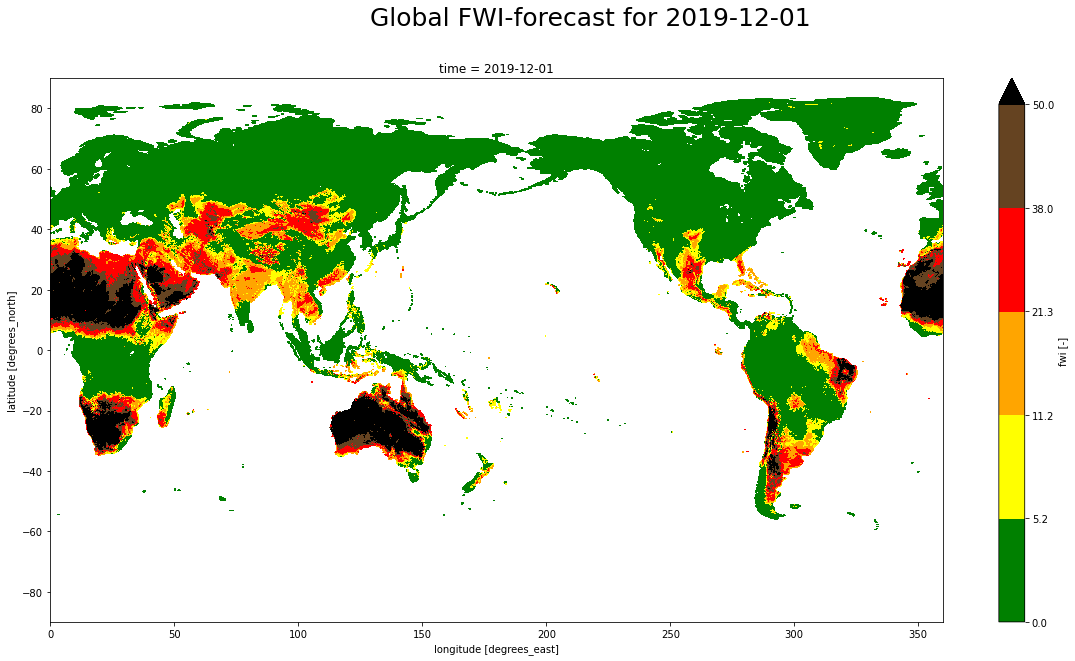

In [8]:
plt.figure(figsize = (20,10)).suptitle(f"Global FWI-forecast for {str(data.fwi[0].time.values.astype('datetime64[D]'))}", fontsize=25)
data.fwi[0].plot(levels = [0.0, 5.2, 11.2, 21.3, 38.0, 50.0],
                 colors = ["#008000", "#FFFF00", "#FFA500", "#FF0000", "#654321", "#000000"],
                 label = ['Very low', 'Low', 'Moderate', 'High', 'Very high', 'Extreme'])

Checking for NaN values.<br>
Numpy array for the `xarray` dataarray can be accessed by `values` attribute. `numpy` provides `isnan` function which returns a boolean mask. `any` method on numpy array can be used to check for atleast one instance of NaN value.

In [9]:
np.isnan(data.fwi[0].values).any()

True

Printing general stats. During calculation, the NaN values are skipped using `skipna` parameter.

In [10]:
def stats(x):
    tmp = x.mean(skipna=True).values
    print('Mean'.ljust(10), tmp)
    print('MAD'.ljust(10), abs(x-tmp).mean(skipna=True).values)
    print('Variance'.ljust(10), x.var(skipna=True).values)
    print('Minimum'.ljust(10), x.min(skipna=True).values)
    print('Maximum'.ljust(10), x.max(skipna=True).values)

In [11]:
stats(data.fwi)

Mean       12.094072
MAD        16.287746
Variance   512.37317
Minimum    1.7278566e-09
Maximum    240.32971
